# **Machine Learning - Assignment 7**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*

---

## Introduction - Complexity in Machine Learning

In this assignment, you will learn about the support vector classifier and how to kernelize a nearest mean classifier. The support vector classifier is a powerful tool for classification tasks, and it is based on the idea of finding the hyperplane that maximizes the margin between the classes. The kernelized nearest mean classifier is a simple classifier that can be used to classify data points based on their distance to the mean of each class.

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Should know the fundament of the support vector classifier
* Should be able to kernelize a nearest mean classifier

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.

---

In [1]:
# Necessary libraries

# !git clone https://github.com/DMJTax/prtools.git
# !pip install -e prtools
!pip install git+https://github.com/DMJTax/prtools.git

!pip install numpy
!pip install matplotlib

  Cloning https://github.com/DMJTax/prtools.git to /tmp/pip-req-build-02q3chdp
  Running command git clone --filter=blob:none --quiet https://github.com/DMJTax/prtools.git /tmp/pip-req-build-02q3chdp
  Resolved https://github.com/DMJTax/prtools.git to commit 38dee74c266c54a1c75318390edc21a87668264f
  Preparing metadata (setup.py) ... done


## 1 - The Support Vector Machine

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### **Exercise 1.1** (Pen & Paper)

Consider the following 2D two-class data set. Class one contains two points:
$\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ and $\begin{pmatrix} 0 \\ 3 \end{pmatrix}$. Class two has a single data point: $\begin{pmatrix} 2 \\ 0 \end{pmatrix}$.

(a) Determine the classifier that maximizes the margin on this classification problem, using a graphical/geometrical reasoning (probably you cannot do the minimization of the support vector error function by hand). How many support vector are obtained?.

> **NOTE:**   
> - bisector: 角平分线  
> - perpendicular bisector: 垂直平分线

**Answer**:   

The classification boundary is the perpendicular bisector of the line segment between (0,1) and (2,0). There are two support vectors.

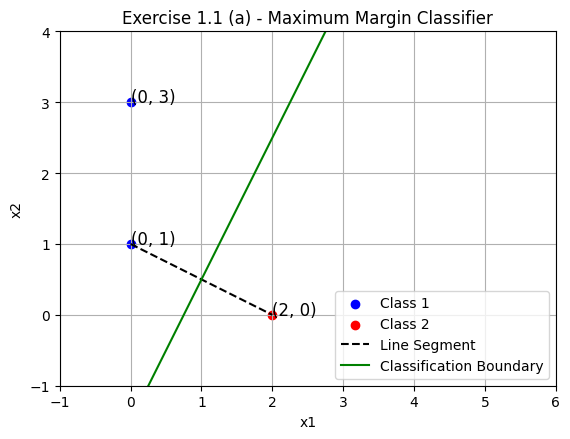

In [3]:
class1_points = np.array([[0, 1], [0, 3]])
class2_points = np.array([[2, 0]])

# data points
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class 1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class 2')

# Plot the line segment connecting (0,1) and (2,0)
line_segment = np.array([class1_points[0], class2_points[0]])
plt.plot(line_segment[:, 0], line_segment[:, 1], 'k--', label='Line Segment')

# point text
for (x, y) in class1_points:
    plt.text(x, y, f'({x}, {y})', fontsize=12)
plt.text(class2_points[0, 0], class2_points[0, 1], f'({class2_points[0, 0]}, {class2_points[0, 1]})', fontsize=12)

# decision boundary
mid_point = np.mean(line_segment, axis=0)
slope = (class2_points[0, 1] - class1_points[0, 1]) / (class2_points[0, 0] - class1_points[0, 0])
perpendicular_slope = -1 / slope
boundary_x = np.linspace(-1, 3, 100)
boundary_y = perpendicular_slope * (boundary_x - mid_point[0]) + mid_point[1]

# plotting
plt.plot(boundary_x, boundary_y, color='green', label='Classification Boundary')

plt.title('Exercise 1.1 (a) - Maximum Margin Classifier')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim(-1, 6)
plt.ylim(-1, 4)

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

(b) Shift the first point above, $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, to $\begin{pmatrix} 0 \\ -1 \end{pmatrix}$. How does the new maximum margin classifier look? What happened to the number of support vectors?

**Answer**:  

The classification boundary now becomes the vertical line through (1,0). All three points become support vectors.

---

### **Exercise 1.2** (Pen & Paper)

Demonstrate, possibly graphically/geometrically, that the support vector classifier is sensitive to feature scaling. Hint: this can be done in 2D based on a training set of size 3 and a single test point.

**Answer**:

One possibility is to consider (0,0) for one class, (1,1) and (2,0) for the other class, and (1,0) as a test point and see how the classification of the last point changes with diﬀerent scalings of the first feature.

Since the SVC relies on the distances between points to establish the boundary, feature scaling can significantly alter these distances. When the data is scaled, especially asymmetrically (only one feature), the boundary can shift, changing the classification outcome for points near the boundary.

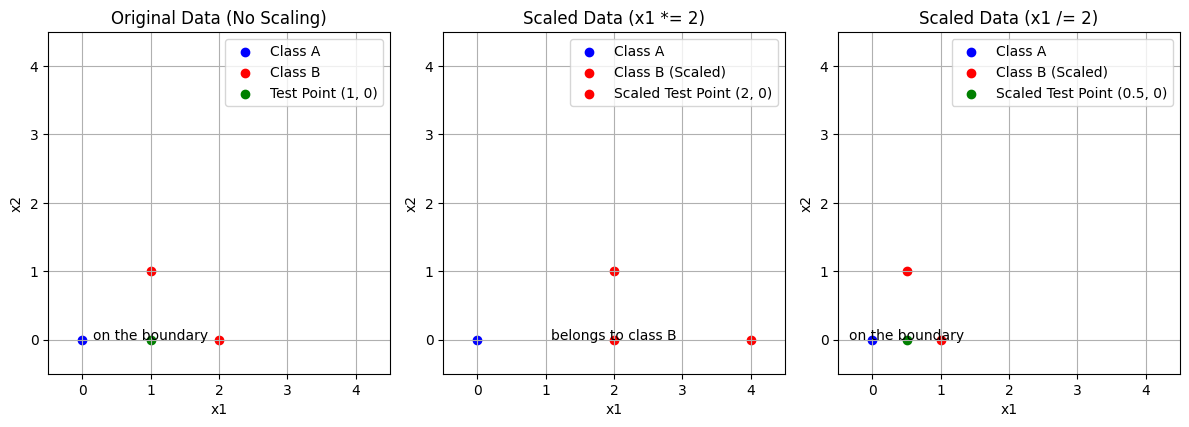

In [4]:
# data points
class_A = np.array([[0, 0]])
class_B = np.array([[1, 1], [2, 0]])
test_point = np.array([[1, 0]])

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

"""before scaling"""

axs[0].text(test_point[0, 0], test_point[0, 1], "on the boundary", ha='center')

axs[0].scatter(class_A[:, 0], class_A[:, 1], color='blue', label='Class A')
axs[0].scatter(class_B[:, 0], class_B[:, 1], color='red', label='Class B')
axs[0].scatter(test_point[:, 0], test_point[:, 1], color='green', label='Test Point (1, 0)')

axs[0].set_title('Original Data (No Scaling)')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()
axs[0].grid(True)

axs[0].set_xlim(-0.5, 4.5)
axs[0].set_ylim(-0.5, 4.5)
axs[0].set_aspect('equal', adjustable='box')

"""after scaling: x1 *= 2"""

scaled_class_B = np.array([[1 * 2, 1], [2 * 2, 0]])
scaled_test_point = np.array([[1 * 2, 0]])

axs[1].text(scaled_test_point[0, 0], scaled_test_point[0, 1], "belongs to class B", ha='center')

axs[1].scatter(class_A[:, 0], class_A[:, 1], color='blue', label='Class A')
axs[1].scatter(scaled_class_B[:, 0], scaled_class_B[:, 1], color='red', label='Class B (Scaled)')
axs[1].scatter(scaled_test_point[:, 0], scaled_test_point[:, 1], color='red', label='Scaled Test Point (2, 0)')

axs[1].set_title('Scaled Data (x1 *= 2)')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].legend()
axs[1].grid(True)

axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(-0.5, 4.5)
axs[1].set_aspect('equal', adjustable='box')

"""after scaling: 2"""

scaled_class_B = np.array([[1 / 2, 1], [2 / 2, 0]])
scaled_test_point = np.array([[1 / 2, 0]])

axs[2].text(scaled_test_point[0, 0], scaled_test_point[0, 1], "on the boundary", ha='center')

axs[2].scatter(class_A[:, 0], class_A[:, 1], color='blue', label='Class A')
axs[2].scatter(scaled_class_B[:, 0], scaled_class_B[:, 1], color='red', label='Class B (Scaled)')
axs[2].scatter(scaled_test_point[:, 0], scaled_test_point[:, 1], color='green', label='Scaled Test Point (0.5, 0)')

axs[2].set_title('Scaled Data (x1 /= 2)')
axs[2].set_xlabel('x1')
axs[2].set_ylabel('x2')
axs[2].legend()
axs[2].grid(True)

axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(-0.5, 4.5)
axs[2].set_aspect('equal', adjustable='box')

plt.tight_layout()
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### **Exercise 1.3** (Pen & Paper)

Study, again, small data sets in 2D, for instance those from 5.1(a) and 5.2, or generate one yourself and compare the solution of the fisherc classifier to those obtained by means of an SVM. In what cases do they differ? Do you see the pattern?

**Answer**:  

The two solutions will be the same when the number of support vectors is three in the 2D case. LDA will always have three "support vectors" in this 2D setting.

More explanations:

- Fisher LDA: works by maximizing the ratio of between-class variance to within-class variance in the data.
- SVM: seeks to find the hyperplane that maximizes the margin between the closest data points of two classes, which are called support vectors.

When all data points in the dataset are support vectors, both Fisher LDA and SVM (particularly in its linear form) will produce the same decision boundary, as both methods are effectively operating on the same data configuration.

## 2 - The Nonlinear Support Vector Machine

### **Exercise 2.1** (Pen & Paper)

(a) Assume we have two objects, represented by 1-dimensional feature vectors $x$ and $\chi$. Find a feature mapping $\phi$ that leads to the inner product $\exp(- (x - \chi)^2)$. Hints: expand the term $-(x - \chi)^2$ and write $\exp(2x\chi)$ as a series based on the Taylor series of the exponential.

(b) What is the dimensionality of the space that $\phi$ maps a 1-dimensional feature vector to?

**Answer**:  

(a) Using the Taylor expansion, one gets \\( \exp (-(x-\chi )^2) = \exp (-x^2) \exp (-\chi ^2) \exp (2 x \chi ) =  \exp (-x^2) \exp (-\chi ^2) \sum \frac  {(2x \chi )^n}{n!}\\).
Rewriting this to \\( \exp (-x^2) \exp (-\chi ^2) \sum \frac  {\sqrt {2^n} x^n}{\sqrt {n!}} \frac  {\sqrt {2^n} \chi ^n}{\sqrt {n!}}\\)
(or something similar), one sees that the feature mapping should be \\(\phi(x):= \exp(-x^2)(1,\sqrt{2}x,\frac{2}{2!}x^2,\frac{2^{3/2}}{3!}x^3, \ldots  )^T\\) .

(b) infinity: $\infty$

### **Exercise 2.2** (Pen & Paper)

> Kernelize the nearest mean classifier

(a) Express the squared distance to any mean of class in terms of regular inner products between the test point $x$ and, say, the $N_C$ samples $x^C_{i}$ from class $C$.

(b) Kernelize the nearest mean classifier by means of the Gaussian kernel, $K(x, \chi) = \exp\left(-\frac{\|x - \chi\|^2}{2\sigma^2}\right)$. Can you show that this boils down to something like a Parzen classifier? You may limit yourself to the two-class case.

**Answer**:

(a) \\(\|  x - \frac{1}{N_C}\sum x_i^C \|^2 = \langle x - \frac{1}{N_C}\sum x_i^C, x - \frac{1}{N_C}\sum x_i^C \rangle\\).
Expanding and some minor rewriting gives \\( \langle x,x \rangle - \frac{2}{N_C}\sum \langle x, x_i^C \rangle + \frac{1}{N_C^2} \sum _i  \sum _j \langle x_i^C, x_j^C \rangle\\).

(b) Realize that for the Gaussian kernel, we have $K(x,\chi) = 1$
if $x = \chi$.  

Comparing samples from class \\(C\\) and class \\(K\\) gives:

$$\|  x - \frac{1}{N_C}\sum x_i^C \|^2 = \|  x - \frac{1}{N_K}\sum x_i^K \|^2$$

$$i.e.$$

$$k(x,x) - \frac{2}{N_C}\sum k(x, x_i^C) + \frac{1}{N_C^2}\sum_i \sum_j k(x_i^C, x_j^C) = k(x,x) - \frac{2}{N_K}\sum k(x, x_i^K) +
\frac{1}{N_K^2}\sum_i \sum_j k(x_i^K, x_j^K)$$

This can be simplified to the following equation for the decision boundary:

$$\frac{1}{N_C}\sum k(x, x_i^C) - \frac{1}{N_K}\sum k(x, x_i^K) + c = 0$$

where \\(c\\) is a constant that merely depends on the training data.
\\(\frac{1}{N_C}\sum k(x, x_i^C)\\) basically provides a Parzen estimate of class \\(C\\).

### **Exercise 2.3** (Coding)
The function svc can be used to both construct linear and non- linear support vector machines. The following kernels K are defined:

* 'linear' -> linear kernel (default)
* 'poly' ->  polynomial kernel with degree param
* 'rbf' -> RBF or Gaussian kernel with width param

To define the kernel in svc using the prtools library, supply a second input argument with a list of kernel type, kernel parameter, and tradeoff parameter C: `svc(a,(kernel type,par,C))`.

(a) On `a = gendatb([20,20])`, train an svc with a ’rbf’ kernel, i.e., the Gaussian kernel, for kernel widths that vary from fairly small (0.1?) to fairly large (10?). Check with a large (enough) independent banana test set how the performance varies for the different choices of kernel widths.

(b) How does the kernel width of parzenc relate to the width of the radial basis function?

(c) Why can the svc, potentially, perform much faster at test time than the Parzen classifier?

**Answer**:

(a)

The RBF kernel function is defined as:

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

Where:

- $K(x_i, x_j)$ is the kernel value between samples $x_i$ and $x_j$.
- $\|x_i - x_j\|$ is the Euclidean distance between the samples.
- $\sigma$ is the width parameter of the kernel.

Effects of the Parameter $\sigma$

1. **Small $\sigma$**:
   - When $\sigma$ is small, $\frac{1}{\sigma^2}$ becomes large, which causes the kernel function to quickly approach zero for distant points.
   - In this scenario, the RBF kernel's influence is very localized, leading the SVM to create a highly complex decision boundary that tightly fits the training data. This results in **overfitting**, where the model performs exceptionally well on the training set but poorly on unseen data.

2. **Moderate $\sigma$**:
   - When $\sigma$ is at a moderate value, the RBF kernel's influence is balanced. The model can effectively capture the underlying structure of the data and create a reasonable decision boundary.
   - At this point, both training and validation errors are relatively low, indicating **appropriate fitting**.

3. **Large $\sigma$**:
   - When $\sigma$ is large, $\frac{1}{\sigma^2}$ becomes small, diminishing the kernel's sensitivity to the distances between samples. Most points will have a similar influence on the decision boundary.
   - Consequently, the model becomes too simplistic, leading to **underfitting**. The decision boundary tends to be overly general, failing to differentiate between classes effectively.

(b)

1. **Similar Role**:
   Both the Parzen window kernel width $h$ and the RBF kernel width $\sigma$ determine the degree of smoothness and the influence of individual points on the resulting model or density estimate. A larger width implies that each data point has a broader influence, resulting in smoother estimates, while a smaller width leads to more localized effects.

2. **Gaussian Connection**:
   If the Parzen window employs a Gaussian kernel, the kernel width $h$ can be thought of as analogous to the $\sigma$ parameter in the RBF kernel. Specifically, you can relate the two parameters as follows:
   $$
   h \propto \sigma
   $$
   This relationship indicates that if you increase the bandwidth $h$ in the Parzen window method, it is equivalent to increasing the width $\sigma$ of the RBF kernel, both resulting in smoother estimates.

3. **Normalization**:
   In density estimation, $h$ is often chosen to balance bias and variance, similar to how $\sigma$ is tuned in SVM to achieve a good trade-off between fitting the training data and generalizing to new data.

(c)

SVM might not have to calculate the distance to **all points** in the training set, as for the Parzen classifier, but svm only needs the distance to the **support vectors**, which may considerably fewer than the number of samples in the training set.

In [5]:
import prtools as pr

Error when rbf kernel param = 0.1: 0.445


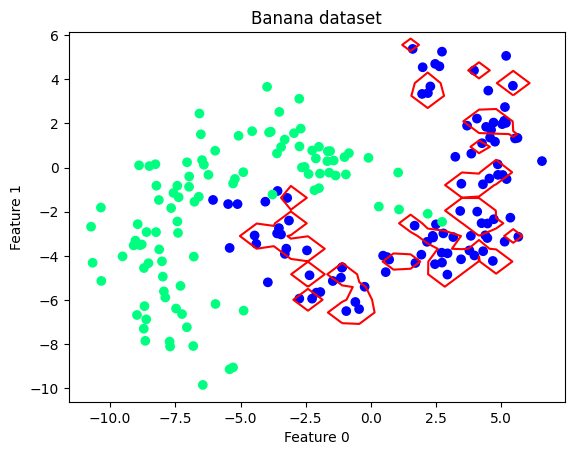

In [6]:
train_data, test_data = pr.gendatb([100, 100]), pr.gendatb([100, 100])

svc1 = pr.svc(('rbf', 0.1, 1))
svc1.train(train_data)

predicted_test_data = svc1.eval(test_data)
error1 = pr.testc(predicted_test_data)
print(f"Error when rbf kernel param = 0.1: {error1}")

pr.scatterd(train_data)
pr.plotc(svc1)
plt.show()

Error when rbf kernel param = 1 : 0.025


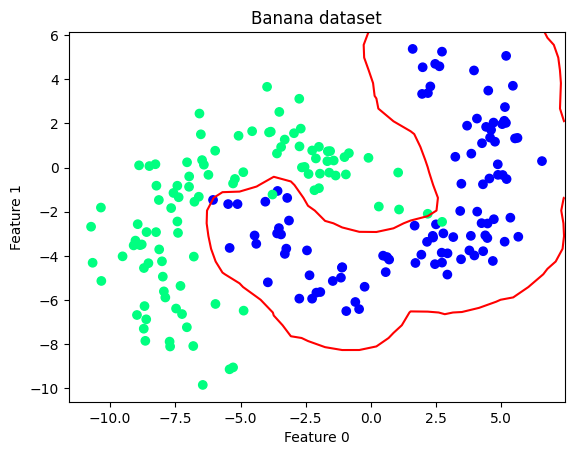

In [7]:
svc2 = pr.svc(('rbf', 1, 1))
svc2.train(train_data)

predicted_test_data = svc2.eval(test_data)
error2 = pr.testc(predicted_test_data)
print(f"Error when rbf kernel param = 1 : {error2}")

pr.scatterd(train_data)
pr.plotc(svc2)
plt.show()

Error when rbf kernel param = 10: 0.11


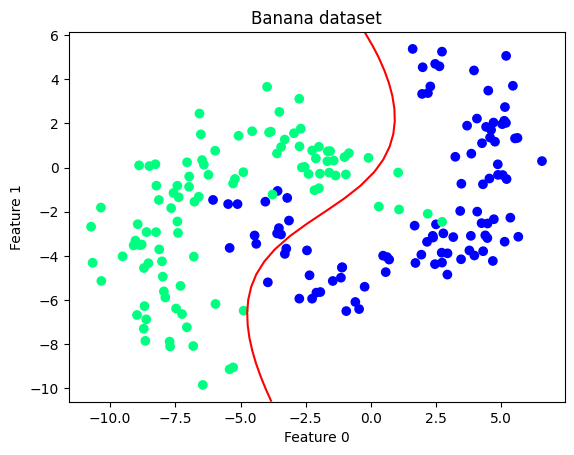

In [8]:
svc3 = pr.svc(('rbf', 10, 1))
svc3.train(train_data)

predicted_test_data = svc3.eval(test_data)
error3 = pr.testc(predicted_test_data)
print(f"Error when rbf kernel param = 10: {error3}")

pr.scatterd(train_data)
pr.plotc(svc3)
plt.show()

In [9]:
print(f"Error when rbf kernel param = 0.1: {error1}")
print(f"Error when rbf kernel param = 1  : {error2}")
print(f"Error when rbf kernel param = 10 : {error3}")

Error when rbf kernel param = 0.1: 0.445
Error when rbf kernel param = 1  : 0.025
Error when rbf kernel param = 10 : 0.11
